# Plot uni-mutational fractions

Draws histograms of $\dfrac{N_2}{N_2 + N_3 + N_4}$ over all nth-CP positions in each sequence.

### TODO

- Filter just to positions with a mutation rate > 0.5% (support doing either, since one is for main text and one is for appendix).
- Tile into a single grid where each row is a diff genome, and cols are CP 1 / 2 / 3. Save to a file.
- Add in NCP as an option -- see gene histograms for example. Not as important.

In [1]:
%run "ComputeUniMutationalFractions.ipynb"

CAMP, CP 1: mean (valid, non-1) f-value = 0.5755627944868879, num valid non-1 f-values = 40,971


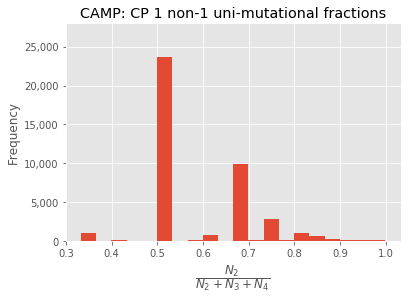

CAMP, CP 2: mean (valid, non-1) f-value = 0.5744063750208774, num valid non-1 f-values = 45,367


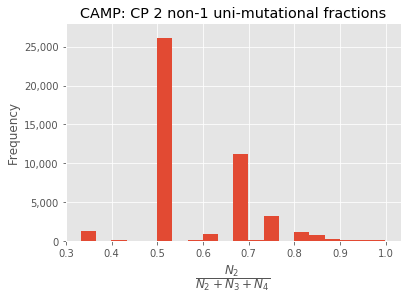

CAMP, CP 3: mean (valid, non-1) f-value = 0.5785083156769981, num valid non-1 f-values = 46,299


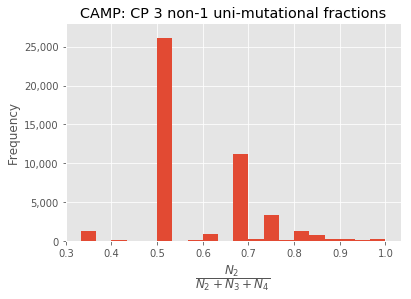

BUT, CP 1: mean (valid, non-1) f-value = 0.5617060306532969, num valid non-1 f-values = 22,553


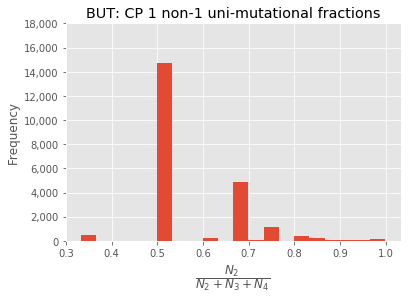

BUT, CP 2: mean (valid, non-1) f-value = 0.558715330107872, num valid non-1 f-values = 24,124


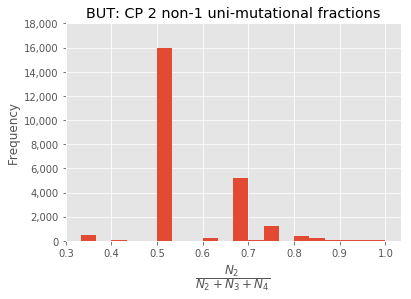

BUT, CP 3: mean (valid, non-1) f-value = 0.5635529009992281, num valid non-1 f-values = 25,765


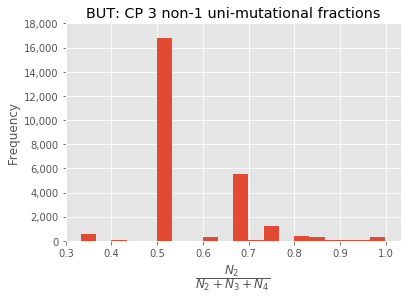

BACT, CP 1: mean (valid, non-1) f-value = 0.5738325931795382, num valid non-1 f-values = 53,134


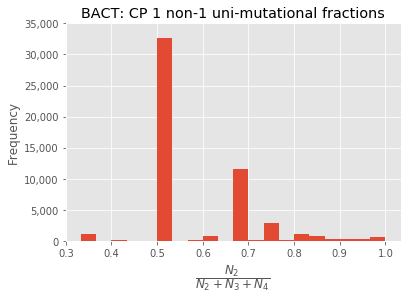

BACT, CP 2: mean (valid, non-1) f-value = 0.5677451941564228, num valid non-1 f-values = 54,083


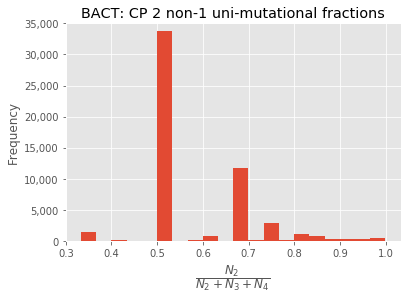

BACT, CP 3: mean (valid, non-1) f-value = 0.5962377732467788, num valid non-1 f-values = 54,717


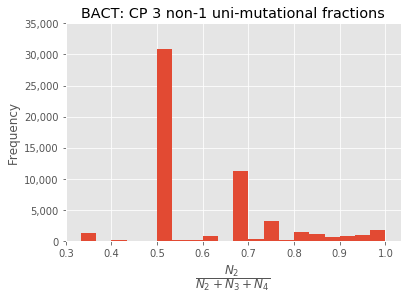

In [2]:
from parse_sco import parse_sco

for seq in SEQS:
    df = parse_sco(
        "/home/marcus/PevznerLabBigData/20201202_big_nonhaplo_oldgfa_graph/20201216_edges/prodigal/{}_genes.sco".format(seq)
    )
    # Go through each gene in this sequence. Find the (third) CPs. Record their "f" value, if present. Plot
    # a histogram of these f-values.
    num2fvals = {1: [], 2: [], 3: []}
    for gene in df.itertuples():
        i = 1
        for pos in get_pos_interval_from_gene(gene):
            f = seq2pos2f[seq][str(pos)]            
            if f is not None and f < 1:
                num2fvals[i].append(f)
            if i == 1:
                i = 2
            elif i == 2:
                i = 3
            elif i == 3:
                i = 1
            else:
                raise ValueError("Codon position modulo calculation is broken :|")

        if i != 1:
            raise ValueError("Gene length not divisible by 3.")
    
    for cp in [1, 2, 3]:
        print("{}, CP {}: mean (valid, non-1) f-value = {}, num valid non-1 f-values = {:,}".format(
            seq2name[seq], cp, mean(num2fvals[cp]), len(num2fvals[cp])
        ))
        pyplot.hist(num2fvals[cp], bins=20)
        pyplot.title("{}: CP {}".format(seq2name[seq], cp) + " non-1 uni-mutational fractions")
        pyplot.xlabel(r"$\dfrac{N_2}{N_2 + N_3 + N_4}$")
        pyplot.ylabel("Frequency")
        use_thousands_sep(pyplot.gca().yaxis)
        # This is a hack to make all CP plots in a row have the same y-axis. Ideally this'd be automatic
        # but uhhhh elbow grease is easier lol
        if seq2name[seq] == "CAMP":
            pyplot.ylim(0, 28000)
        elif seq2name[seq] == "BUT":
            pyplot.ylim(0, 18000)
        else:
            pyplot.ylim(0, 35000)
        pyplot.show()